In [1]:
import pandas as pd  

# Load the dataset  
file_path = file_path = r"D:\archive (3)\imdb-movies-dataset.csv"
  # Update this path if needed  
df = pd.read_csv(file_path)  

# Display basic information  
print("Dataset Info:")
print(df.info())

# Display the first few rows  
print("\nFirst 5 Rows:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         10000 non-null  int64  
 1   Title           10000 non-null  object 
 2   Year            9850 non-null   float64
 3   Certificate     7370 non-null   object 
 4   Duration (min)  9664 non-null   float64
 5   Genre           9993 non-null   object 
 6   Rating          9596 non-null   float64
 7   Metascore       7555 non-null   float64
 8   Director        9995 non-null   object 
 9   Cast            9961 non-null   object 
 10  language        10000 non-null  object 
 11  Votes           9596 non-null   object 
 12  Description     10000 non-null  object 
 13  Review Count    9999 non-null   object 
 14  Review Title    9483 non-null   object 
 15  Review          9484 non-null   object 
dtypes: float64(4), int64(1), object(11)
memory usage: 1.2+ MB
None


In [3]:
# Check for missing values  
print("\nMissing Values Count:")
print(df.isnull().sum())

# Check percentage of missing values  
missing_percentage = df.isnull().sum() / len(df) * 100  
print("\nMissing Values Percentage:")
print(missing_percentage)



Missing Values Count:
user_id              0
Title                0
Year               150
Certificate       2630
Duration (min)     336
Genre                7
Rating             404
Metascore         2445
Director             5
Cast                39
language             0
Votes              404
Description          0
Review Count         1
Review Title       517
Review             516
dtype: int64

Missing Values Percentage:
user_id            0.00
Title              0.00
Year               1.50
Certificate       26.30
Duration (min)     3.36
Genre              0.07
Rating             4.04
Metascore         24.45
Director           0.05
Cast               0.39
language           0.00
Votes              4.04
Description        0.00
Review Count       0.01
Review Title       5.17
Review             5.16
dtype: float64


In [4]:
# Check for duplicates  
print("\nTotal duplicate rows before removal:", df.duplicated().sum())

# Remove duplicates  
df = df.drop_duplicates()

# Check again  
print("Total duplicate rows after removal:", df.duplicated().sum())

# Check data types  
print("\nData Types:")
print(df.dtypes)

# Convert 'Votes' column to numeric (removing commas)
df['Votes'] = df['Votes'].astype(str).str.replace(',', '').astype(float)

# Convert 'Year' column to integer  
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Convert categorical columns to lowercase for consistency  
df['Genre'] = df['Genre'].str.lower().str.strip()
df['Director'] = df['Director'].str.lower().str.strip()
df['language'] = df['language'].str.lower().str.strip()
# Ensure 'Votes' is numeric (handling errors if needed)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
# Ensure 'Votes' is numeric (handling errors if needed)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')


df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Drop NaN values for clean plotting
df = df.dropna(subset=['Votes', 'Rating', 'Genre'])

# Exploding the 'Genre' column properly
df_exploded = df.copy()
df_exploded['Genre'] = df_exploded['Genre'].str.split(',')
df_exploded = df_exploded.explode('Genre').reset_index(drop=True)
# Fill missing values in categorical columns with 'Unknown'
df[['Genre', 'Director', 'language']] = df[['Genre', 'Director', 'language']].fillna('Unknown')



Total duplicate rows before removal: 0
Total duplicate rows after removal: 0

Data Types:
user_id             int64
Title              object
Year              float64
Certificate        object
Duration (min)    float64
Genre              object
Rating            float64
Metascore         float64
Director           object
Cast               object
language           object
Votes              object
Description        object
Review Count       object
Review Title       object
Review             object
dtype: object



Numerical Columns for Normalization:
Index(['user_id', 'Year', 'Duration (min)', 'Rating', 'Metascore', 'Votes'], dtype='object')

After Normalization:
            Rating        Votes    Metascore  Duration (min)
count  9596.000000  9596.000000  7555.000000     9587.000000
mean      0.611739     0.033279     0.576447        0.091025
std       0.125168     0.062871     0.180255        0.033019
min       0.000000     0.000000     0.000000        0.000000
25%       0.535714     0.003917     0.449495        0.071327
50%       0.619048     0.012804     0.575758        0.085592
75%       0.702381     0.034716     0.707071        0.104137
max       1.000000     1.000000     1.000000        1.000000


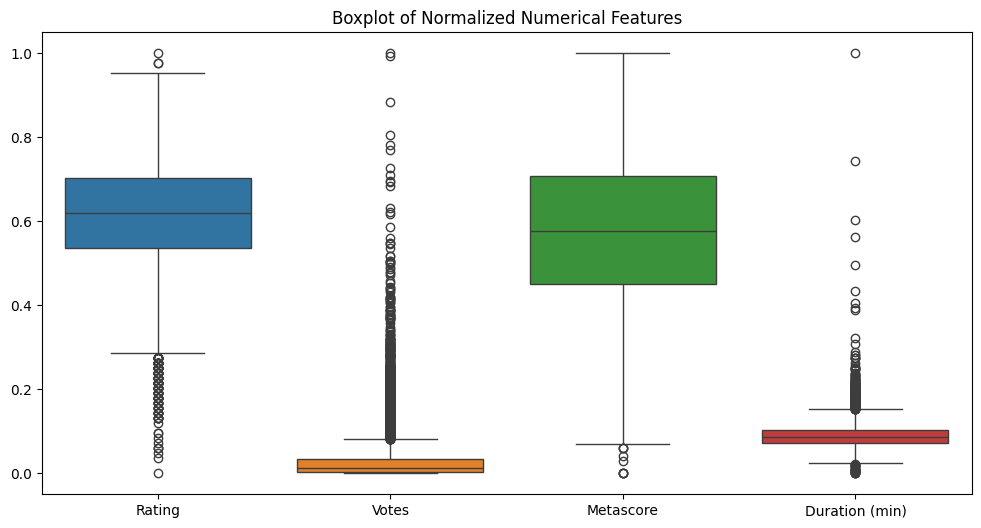


Normalized dataset saved successfully!


In [6]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical Columns for Normalization:")
print(numerical_cols)
from sklearn.preprocessing import MinMaxScaler  

# Initialize the scaler
scaler = MinMaxScaler()

# List of numerical columns to normalize  
columns_to_normalize = ['Rating', 'Votes', 'Metascore', 'Duration (min)']

# Apply Min-Max Normalization  
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Check the transformed data  
print("\nAfter Normalization:")
print(df[columns_to_normalize].describe())
import matplotlib.pyplot as plt  
import seaborn as sns  

# Plot boxplots to check for outliers  
plt.figure(figsize=(12,6))
sns.boxplot(data=df[columns_to_normalize])
plt.title("Boxplot of Normalized Numerical Features")
plt.show()
df.to_csv("cleaned_normalized_imdb_dataset.csv", index=False)
print("\nNormalized dataset saved successfully!")


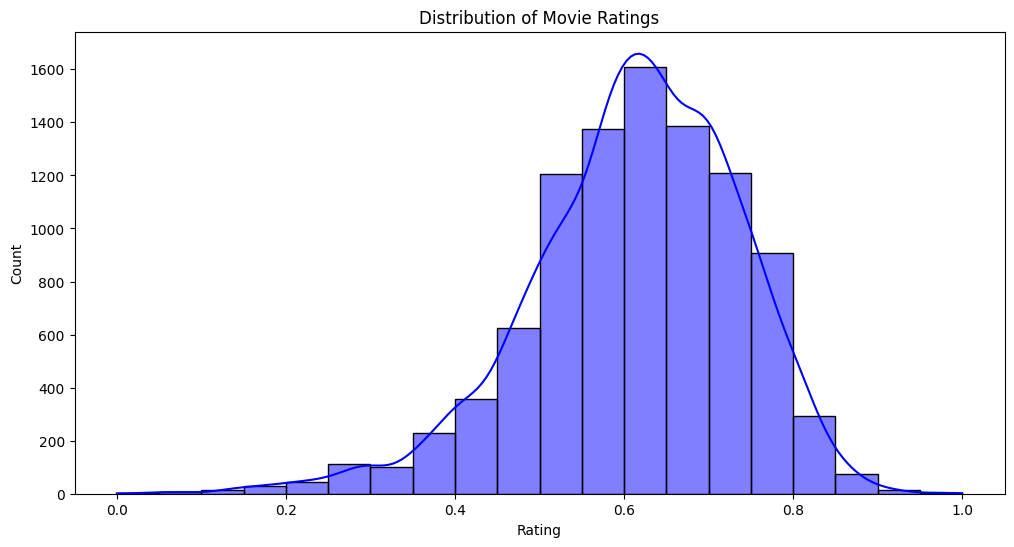

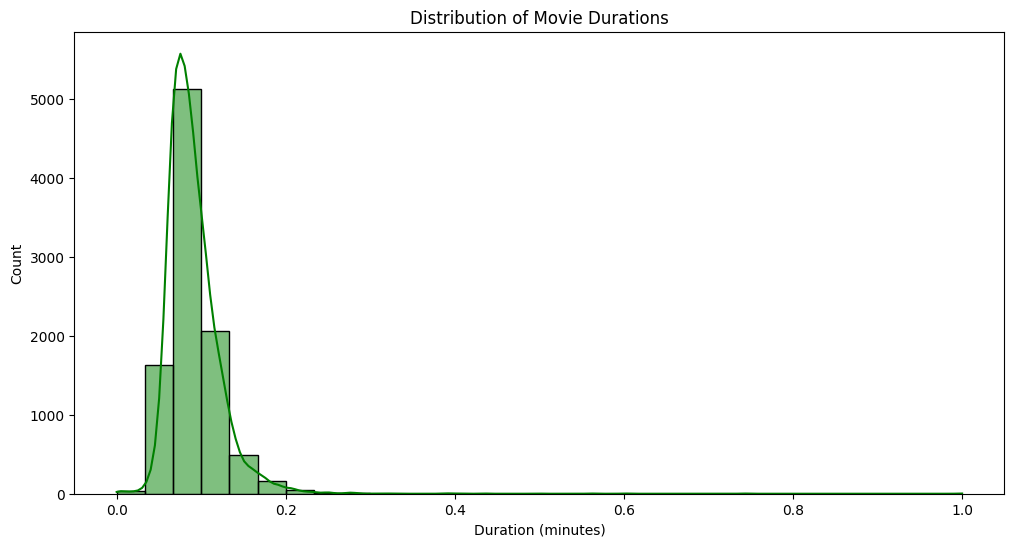

C:\Users\asus\AppData\Local\Temp\ipykernel_17640\4123574390.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Certificate", order=df['Certificate'].value_counts().index, palette="viridis")


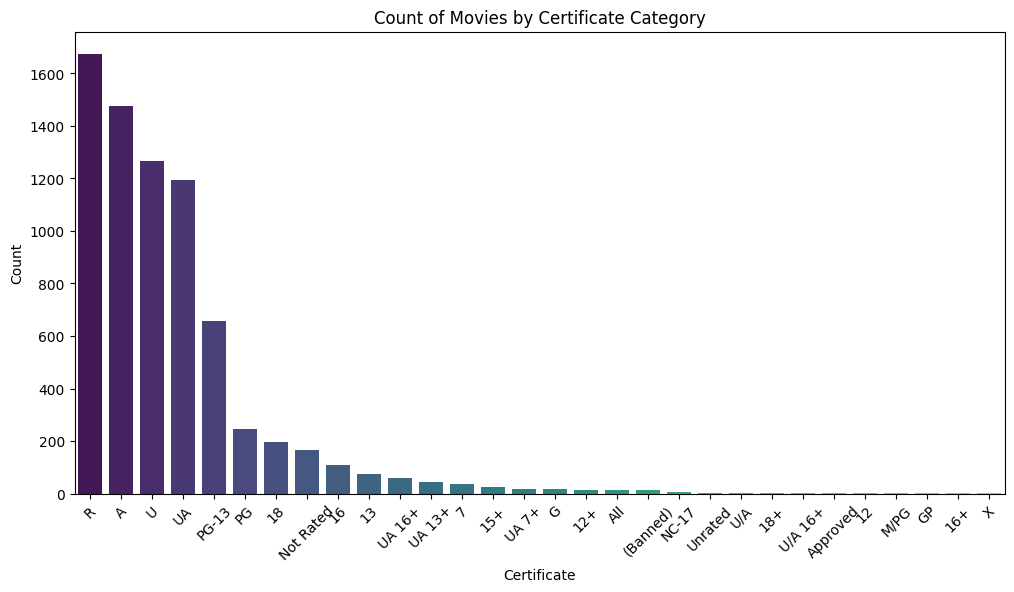

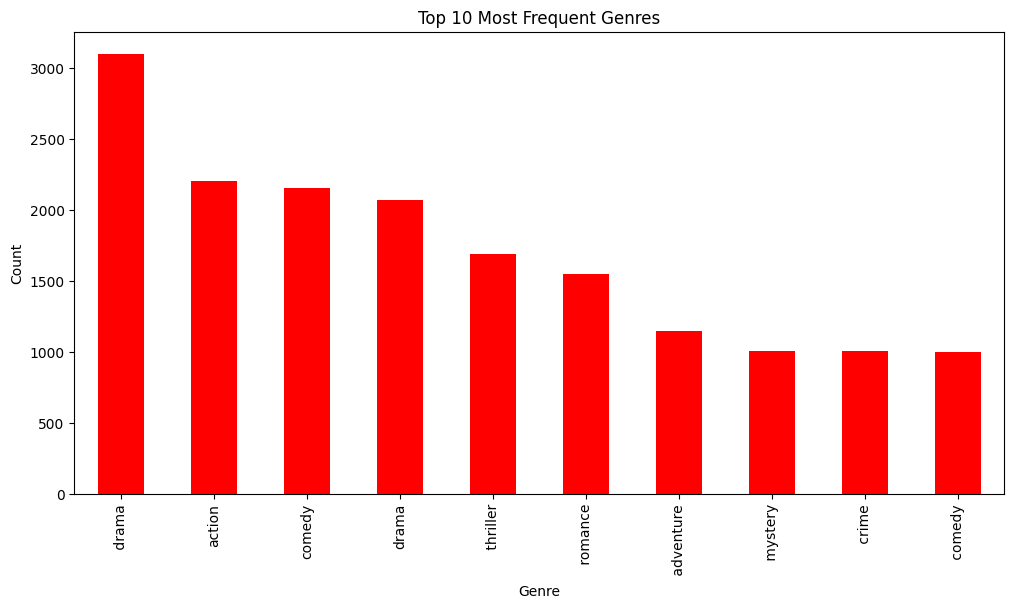

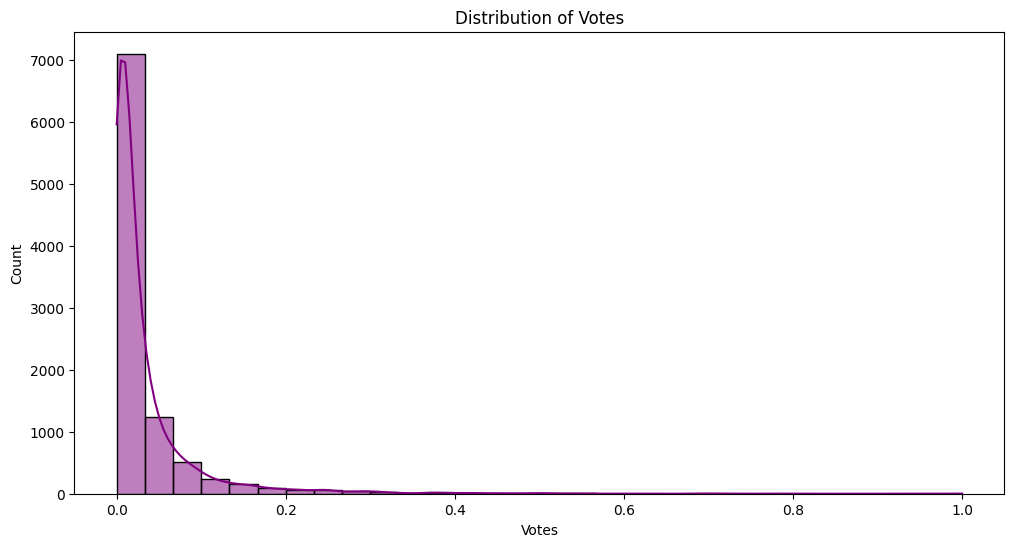

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned and normalized dataset
file_path = "C:/Users/asus/OneDrive/Desktop/jupyter/cleaned_normalized_imdb_dataset.csv"  # Update the correct file path
df = pd.read_csv(file_path)

# Set figure size for better visualization
plt.figure(figsize=(12, 6))

# 1. Distribution of Movie Ratings
sns.histplot(df['Rating'], bins=20, kde=True, color='blue')
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# 2. Distribution of Movie Durations
plt.figure(figsize=(12, 6))
sns.histplot(df['Duration (min)'], bins=30, kde=True, color='green')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.show()

# 3. Count of Movies per Certificate Category
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Certificate", order=df['Certificate'].value_counts().index, palette="viridis")
plt.title("Count of Movies by Certificate Category")
plt.xlabel("Certificate")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 4. Top 10 Most Frequent Genres
plt.figure(figsize=(12, 6))
df['Genre'].str.split(',').explode().value_counts()[:10].plot(kind='bar', color='red')
plt.title("Top 10 Most Frequent Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

# 5. Distribution of Votes
plt.figure(figsize=(12, 6))
sns.histplot(df['Votes'], bins=30, kde=True, color='purple')
plt.title("Distribution of Votes")
plt.xlabel("Votes")
plt.ylabel("Count")
plt.show()


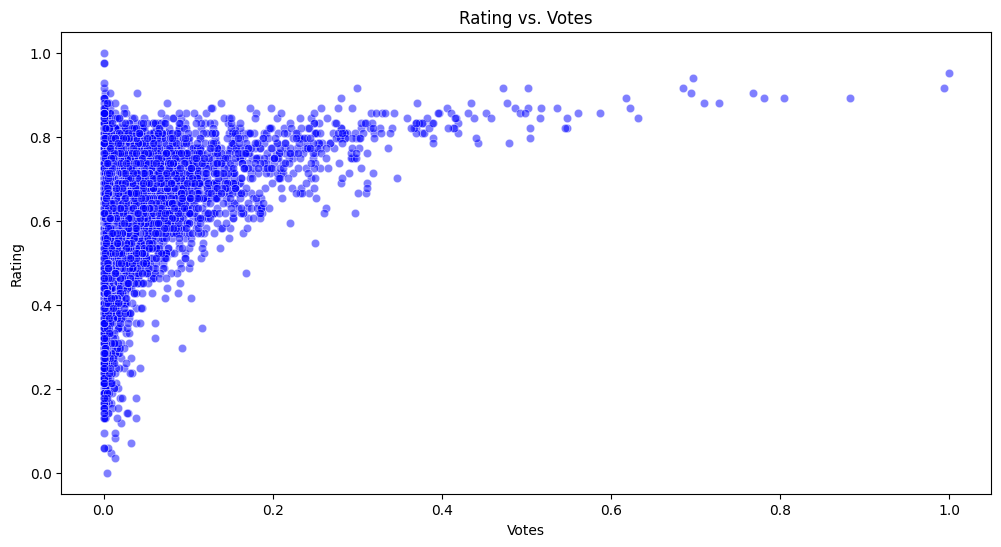

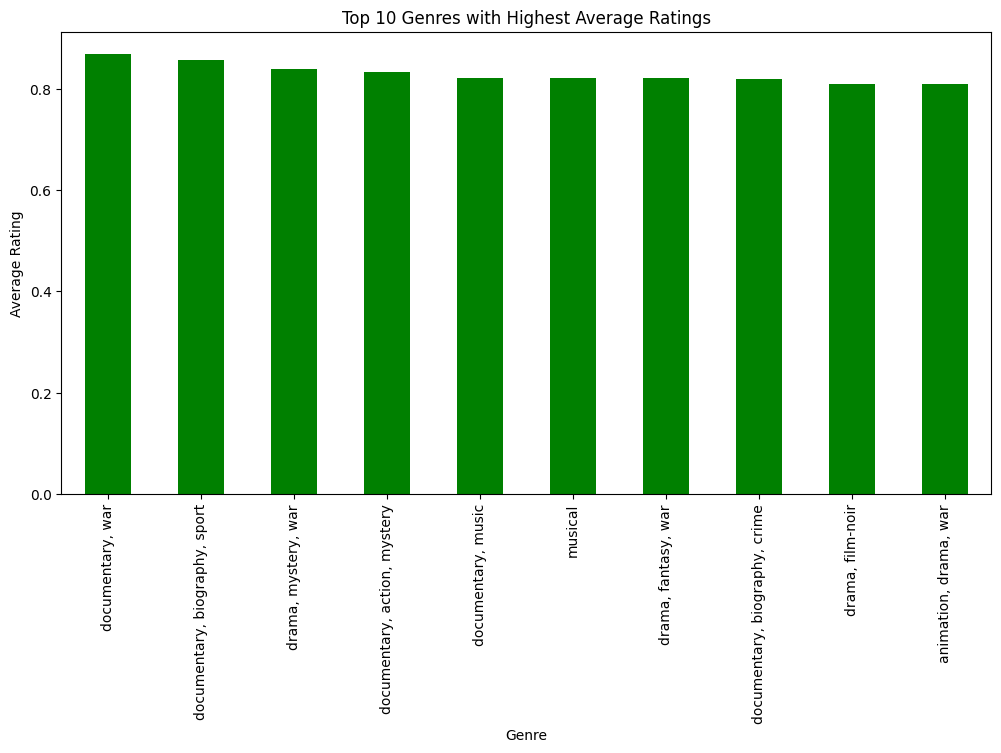

C:\Users\asus\AppData\Local\Temp\ipykernel_17640\2025454301.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Certificate", y="Rating", palette="coolwarm")


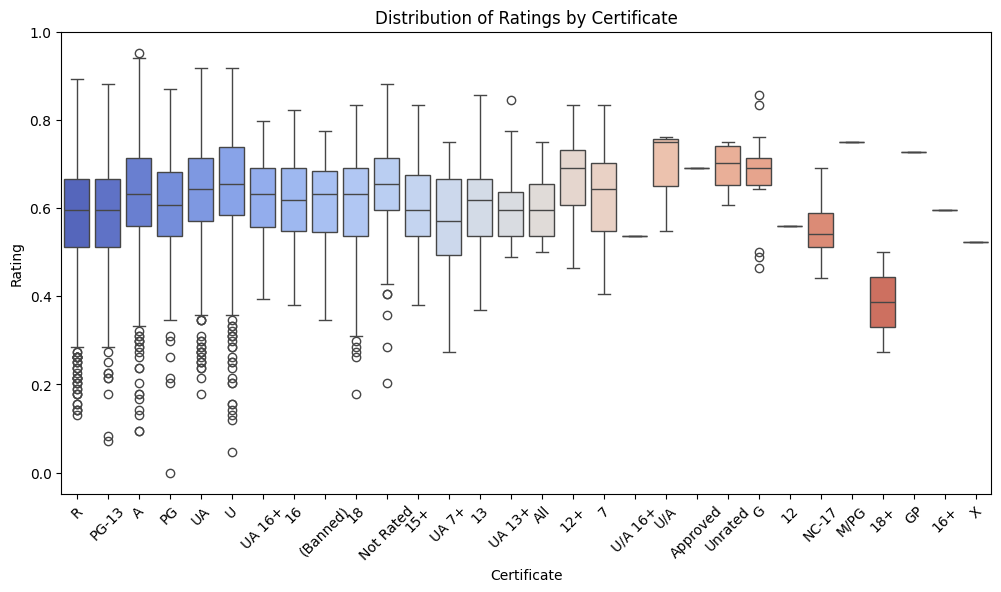

In [ ]:
# 1. Rating vs. Votes (How ratings relate to votes)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Votes", y="Rating", alpha=0.5, color='indico')
plt.title("Rating vs. Votes")
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.show()

# 2. Average Rating per Genre
genre_ratings = df.explode('Genre').groupby('Genre')['Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
genre_ratings[:10].plot(kind='bar', color='green')
plt.title("Top 10 Genres with Highest Average Ratings")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.show()

# 3. Boxplot of Ratings by Certificate
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Certificate", y="Rating", palette="coolwarm")
plt.title("Distribution of Ratings by Certificate")
plt.xlabel("Certificate")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.show()


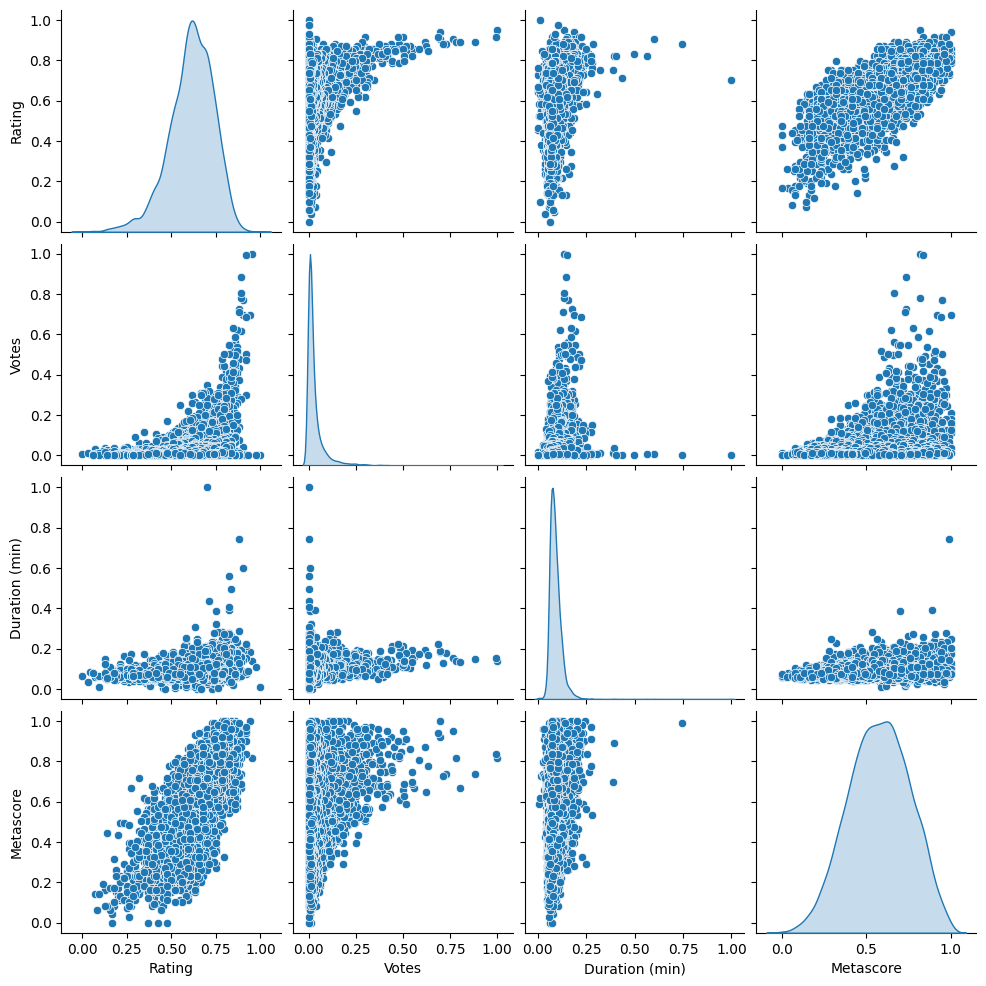

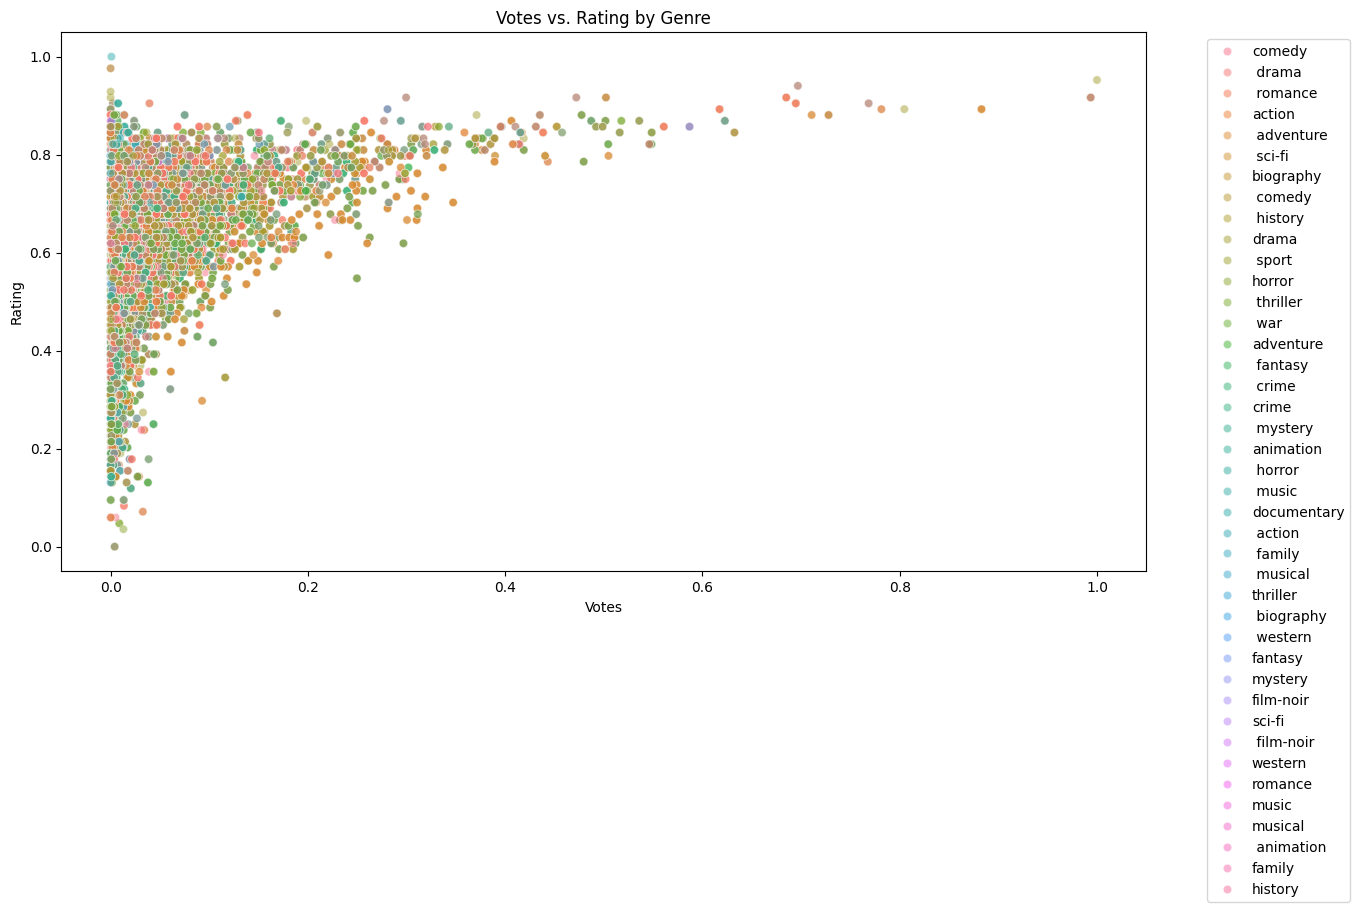

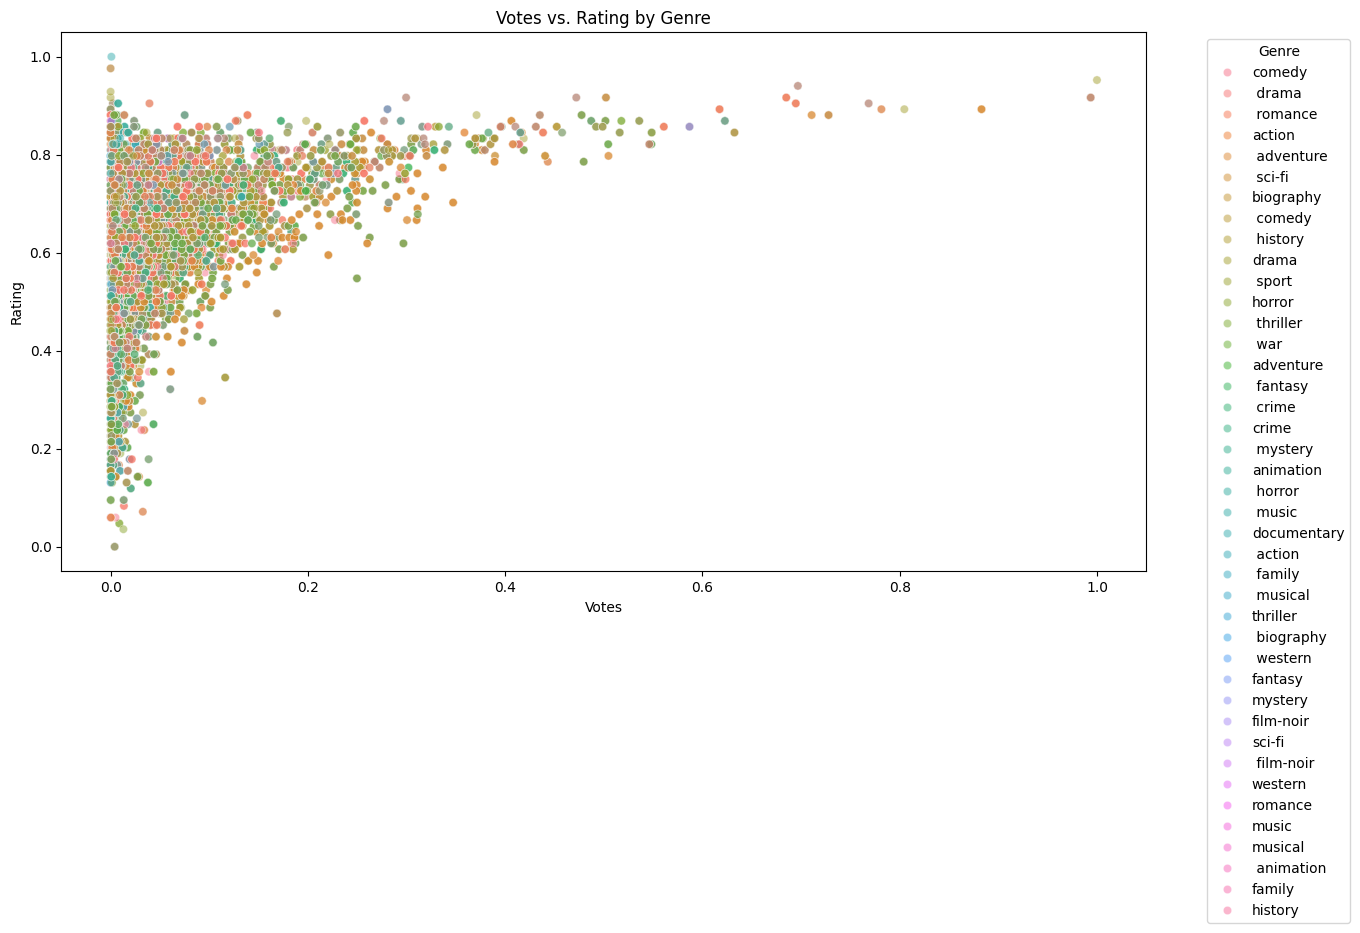

In [9]:
# 1. Pairplot of Important Numerical Features
sns.pairplot(df[['Rating', 'Votes', 'Duration (min)', 'Metascore']], diag_kind='kde')
plt.show()

# 2. Genre-wise Rating Distribution with Vote Count
# Step 1: Split & Explode the Genres
df_genre = df.copy()
df_genre['Genre'] = df_genre['Genre'].str.split(',')
df_genre = df_genre.explode('Genre')

# Step 2: Plot
plt.figure(figsize=(14,7))
sns.scatterplot(data=df_genre, x="Votes", y="Rating", hue="Genre", alpha=0.5)
plt.title("Votes vs. Rating by Genre")
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Scatter plot of Votes vs. Rating by Genre
plt.figure(figsize=(14, 7))
# Explode 'Genre' to separate multiple genres per movie
df_genre_exploded = df[['Votes', 'Rating', 'Genre']].copy()
df_genre_exploded['Genre'] = df_genre_exploded['Genre'].str.split(',')
df_genre_exploded = df_genre_exploded.explode('Genre').reset_index(drop=True)  # Reset index to avoid duplicates
# Plot using the cleaned dataset
sns.scatterplot(data=df_genre_exploded, x="Votes", y="Rating", hue="Genre", alpha=0.5)
plt.title("Votes vs. Rating by Genre")
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()



In [8]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical columns
categorical_cols = ['Certificate', 'language']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

from sklearn.preprocessing import MultiLabelBinarizer

# Convert the 'Genre' column into a list of genres
df_encoded['Genre'] = df_encoded['Genre'].astype(str).apply(lambda x: x.split(','))

# Apply MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df_encoded['Genre'])

# Convert the result into a DataFrame
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)

# Merge with the original dataset and drop the original 'Genre' column
df_encoded = pd.concat([df_encoded, genre_df], axis=1).drop(columns=['Genre'])

from sklearn.feature_extraction.text import TfidfVectorizer

# Use TF-IDF Vectorization for Review column
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=500)

# Fit and transform the review column
tfidf_features = tfidf_vectorizer.fit_transform(df_encoded['Review'].astype(str))

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Merge with original dataset
df_encoded = pd.concat([df_encoded, tfidf_df], axis=1).drop(columns=['Review'])

from sklearn.preprocessing import MinMaxScaler

# Select numerical features for scaling
numeric_features = ['Rating', 'Votes', 'Duration (min)', 'Metascore']

# Apply MinMaxScaler
scaler = MinMaxScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])


print(df.head())  # Display transformed dataset






   user_id                              Title    Year Certificate  \
0        1                    The Idea of You  2023.0           R   
1        2  Kingdom of the Planet of the Apes  2023.0       PG-13   
2        3                          Unfrosted  2023.0       PG-13   
3        4                       The Fall Guy  2023.0       PG-13   
4        5                        Challengers  2023.0           R   

   Duration (min)                       Genre    Rating  Metascore  \
0        0.099857      comedy, drama, romance  0.607143   0.666667   
1        0.142653   action, adventure, sci-fi  0.714286   0.656566   
2        0.074180  biography, comedy, history  0.500000   0.414141   
3        0.115549       action, comedy, drama  0.714286   0.727273   
4        0.122682       drama, romance, sport  0.761905   0.818182   

            Director                                               Cast  \
0  michael showalter  Anne Hathaway, Nicholas Galitzine, Ella Rubin,...   
1           we

In [10]:
# Combine important text features
df['combined_features'] = (
    df['Title'].fillna('') + " " +
    df['Genre'].fillna('') + " " +
    df['Director'].fillna('') + " " +
    df['Cast'].fillna('')
)

print("\n✅ 'combined_features' column created successfully!")

# Verify the new column
print(df[['Title', 'Genre', 'Director', 'Cast', 'combined_features']].head())
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Convert text to numerical vectors
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['combined_features'])

# Compute similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

print("\n✅ Cosine similarity matrix created successfully!")



✅ 'combined_features' column created successfully!
                               Title                       Genre  \
0                    The Idea of You      comedy, drama, romance   
1  Kingdom of the Planet of the Apes   action, adventure, sci-fi   
2                          Unfrosted  biography, comedy, history   
3                       The Fall Guy       action, comedy, drama   
4                        Challengers       drama, romance, sport   

            Director                                               Cast  \
0  michael showalter  Anne Hathaway, Nicholas Galitzine, Ella Rubin,...   
1           wes ball  Owen Teague, Freya Allan, Kevin Durand, Peter ...   
2     jerry seinfeld  Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...   
3       david leitch  Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...   
4    luca guadagnino  Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...   

                                   combined_features  
0  The Idea of You comedy, drama,

In [11]:
from surprise import SVD, KNNBasic, NMF, BaselineOnly
from surprise import accuracy
from surprise import Reader
from surprise import Dataset



df = pd.read_csv(r"C:\Users\asus\OneDrive\Desktop\jupyter\cleaned_normalized_imdb_dataset.csv")  # Ensure the path is correct

# Check if required columns exist
print(df.columns)  # Ensure 'user_id', 'Title', and 'Rating' exist

# Define the rating scale (ensure ratings match your dataset)
reader = Reader(rating_scale=(1, 10))  # Adjust based on actual rating range

# **Fix:** Load dataset into Surprise
data = Dataset.load_from_df(df[['user_id', 'Title', 'Rating']], reader)

# **Fix:** Build trainset & testset correctly
trainset = data.build_full_trainset()
testset = trainset.build_testset()


# Train and evaluate SVD
model_svd = SVD()
model_svd.fit(trainset)
predictions_svd = model_svd.test(testset)
rmse_svd = accuracy.rmse(predictions_svd)


# Train and evaluate KNNBasic
model_knn = KNNBasic()
model_knn.fit(trainset)
predictions_knn = model_knn.test(testset)
rmse_knn = accuracy.rmse(predictions_knn)

# Train and evaluate NMF
model_nmf = NMF()
model_nmf.fit(trainset)
predictions_nmf = model_nmf.test(testset)
rmse_nmf = accuracy.rmse(predictions_nmf)

# Train and evaluate BaselineOnly
model_baseline = BaselineOnly()
model_baseline.fit(trainset)
predictions_baseline = model_baseline.test(testset)
rmse_baseline = accuracy.rmse(predictions_baseline)

# Compute the average RMSE of all models
average_rmse = (rmse_svd + rmse_knn + rmse_nmf + rmse_baseline) / 4
print("\nAverage RMSE of All Models:", average_rmse)

# Identify the best model
rmse_scores = {
    "SVD": rmse_svd,
    "KNNBasic": rmse_knn,
    "NMF": rmse_nmf,
    "BaselineOnly": rmse_baseline
}

best_model_name = min(rmse_scores, key=rmse_scores.get)
print(f"\nBest Model: {best_model_name} with RMSE = {rmse_scores[best_model_name]}")

# Select the best model
best_model = model_svd if best_model_name == "SVD" else (
    model_knn if best_model_name == "KNNBasic" else (
        model_nmf if best_model_name == "NMF" else model_baseline
    )
)
def recommend_movies_for_user(user_id, model, df, num_recommendations=5):
    """ Recommend top movies for a given user """
    movie_list = df['Title'].unique()
    predictions = [(movie, model.predict(user_id, movie).est) for movie in movie_list]
    predictions.sort(key=lambda x: x[1], reverse=True)
    return [pred[0] for pred in predictions[:num_recommendations]]


# Get recommendations from the best model
user_recommendations = recommend_movies_for_user(1, best_model, df)
print("\nRecommended Movies:", user_recommendations)





Index(['user_id', 'Title', 'Year', 'Certificate', 'Duration (min)', 'Genre',
       'Rating', 'Metascore', 'Director', 'Cast', 'language', 'Votes',
       'Description', 'Review Count', 'Review Title', 'Review'],
      dtype='object')
RMSE: 0.4079
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.4079
RMSE: 0.4079
Estimating biases using als...
RMSE: 0.4079

Average RMSE of All Models: 0.40793605811954115

Best Model: SVD with RMSE = 0.40793605811954115

Recommended Movies: ['Holy Spider', 'The Idea of You', 'Kingdom of the Planet of the Apes', 'Unfrosted', 'The Fall Guy']


In [12]:
from surprise.model_selection import GridSearchCV

# Define hyperparameter grid for each model
param_grid_svd = {
    'n_factors': [50, 100, 150], 
    'lr_all': [0.002, 0.005, 0.01],  
    'reg_all': [0.02, 0.05, 0.1] 
}
param_grid_knn = {
    'k': [10, 20, 30],  
    'sim_options': {'name': ['cosine', 'msd', 'pearson'], 'user_based': [True, False]}  
}
param_grid_nmf = {
    'n_factors': [10, 20, 30], 
    'reg_pu': [0.02, 0.06, 0.1],  
    'reg_qi': [0.02, 0.06, 0.1]  
}

# Tune SVD
gs_svd = GridSearchCV(SVD, param_grid_svd, measures=['rmse'], cv=3, n_jobs=-1)
gs_svd.fit(data)
print("\nBest SVD RMSE:", gs_svd.best_score['rmse'])
print("Best SVD Parameters:", gs_svd.best_params['rmse'])

# Tune KNNBasic
gs_knn = GridSearchCV(KNNBasic, param_grid_knn, measures=['rmse'], cv=3, n_jobs=-1)
gs_knn.fit(data)
print("\nBest KNN RMSE:", gs_knn.best_score['rmse'])
print("Best KNN Parameters:", gs_knn.best_params['rmse'])

# Tune NMF
gs_nmf = GridSearchCV(NMF, param_grid_nmf, measures=['rmse'], cv=3, n_jobs=-1)
gs_nmf.fit(data)
print("\nBest NMF RMSE:", gs_nmf.best_score['rmse'])
print("Best NMF Parameters:", gs_nmf.best_params['rmse'])



Best SVD RMSE: 0.4079333863766013
Best SVD Parameters: {'n_factors': 50, 'lr_all': 0.002, 'reg_all': 0.02}

Best KNN RMSE: 0.407926491983756
Best KNN Parameters: {'k': 10, 'sim_options': {'name': 'cosine', 'user_based': True}}

Best NMF RMSE: 0.40792257633292706
Best NMF Parameters: {'n_factors': 10, 'reg_pu': 0.02, 'reg_qi': 0.02}


In [13]:
# Import required libraries
from surprise import SVD, KNNBasic, NMF
from surprise import accuracy

# Train best models using tuned parameters
best_svd = SVD(n_factors=50, lr_all=0.002, reg_all=0.02)
best_knn = KNNBasic(k=10, sim_options={'name': 'cosine', 'user_based': True})
best_nmf = NMF(n_factors=10, reg_pu=0.02, reg_qi=0.02)

best_svd.fit(trainset)
best_knn.fit(trainset)
best_nmf.fit(trainset)

# Get predictions from each model
predictions_svd = best_svd.test(testset)
predictions_knn = best_knn.test(testset)
predictions_nmf = best_nmf.test(testset)

# Combine predictions (average rating estimation)
final_predictions = []
for i in range(len(testset)):
    uid, iid, true_r = testset[i]
    pred_svd = best_svd.predict(uid, iid).est
    pred_knn = best_knn.predict(uid, iid).est
    pred_nmf = best_nmf.predict(uid, iid).est
    avg_pred = (pred_svd + pred_knn + pred_nmf) / 3  # Average rating prediction
    final_predictions.append((uid, iid, true_r, avg_pred))

# Calculate RMSE for the hybrid model
hybrid_rmse = accuracy.rmse([
    (p[0], p[1], p[2], p[3], None) for p in final_predictions 
])



Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.4079
